In [22]:
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import numpy as np

In [31]:
dat = pd.read_csv('../data/higgs-boson/training.csv')
dat.loc[dat.Label == 's', 'Label']=1
dat.loc[dat.Label == 'b', 'Label']=0
class Higgs(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe
    def __len__(self):
        return(self.dataframe.shape[0])
    def __getitem__(self, i):
        row = self.dataframe.iloc[i,:]
        inp = row[[x for x in self.dataframe.columns if x not in ['EventId', 'Label']]]
        out = row[['Label']]
        return(np.array(inp).astype('float32'), np.array(out[0]).astype('uint8'))

dl = DataLoader(Higgs(dat), batch_size=2)

In [32]:
#h = Higgs(dat)
#h.__getitem__(4)
next(iter(dl))

/var/folders/9r/1rqvn79x3mz8n_knlfpfzk440000gn/T/ipykernel_26149/27022088.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return(np.array(inp).astype('float32'), np.array(out[0]).astype('uint8'))
/var/folders/9r/1rqvn79x3mz8n_knlfpfzk440000gn/T/ipykernel_26149/27022088.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return(np.array(inp).astype('float32'), np.array(out[0]).astype('uint8'))


[tensor([[ 1.3847e+02,  5.1655e+01,  9.7827e+01,  2.7980e+01,  9.1000e-01,
           1.2471e+02,  2.6660e+00,  3.0640e+00,  4.1928e+01,  1.9776e+02,
           1.5820e+00,  1.3960e+00,  2.0000e-01,  3.2638e+01,  1.0170e+00,
           3.8100e-01,  5.1626e+01,  2.2730e+00, -2.4140e+00,  1.6824e+01,
          -2.7700e-01,  2.5873e+02,  2.0000e+00,  6.7435e+01,  2.1500e+00,
           4.4400e-01,  4.6062e+01,  1.2400e+00, -2.4750e+00,  1.1350e+02,
           2.6533e-03],
         [ 1.6094e+02,  6.8768e+01,  1.0324e+02,  4.8146e+01, -9.9900e+02,
          -9.9900e+02, -9.9900e+02,  3.4730e+00,  2.0780e+00,  1.2516e+02,
           8.7900e-01,  1.4140e+00, -9.9900e+02,  4.2014e+01,  2.0390e+00,
          -3.0110e+00,  3.6918e+01,  5.0100e-01,  1.0300e-01,  4.4704e+01,
          -1.9160e+00,  1.6455e+02,  1.0000e+00,  4.6226e+01,  7.2500e-01,
           1.1580e+00, -9.9900e+02, -9.9900e+02, -9.9900e+02,  4.6226e+01,
           2.2336e+00]]),
 tensor([1, 0], dtype=torch.uint8)]

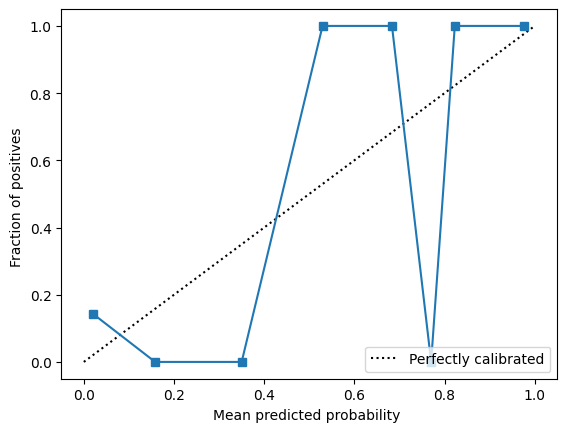

In [35]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve, CalibrationDisplay
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
y_prob = clf.predict_proba(X_test)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)
disp = CalibrationDisplay(prob_true, prob_pred, y_prob)
disp.plot()

In [36]:
!pip install uncertainty_metrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 5.5 MB/s eta 0:00:00


In [43]:
import uncertainty_metrics.numpy as um


ece = um.ece(y_test, y_prob, num_bins=30); print("ECE: ", ece)
ace = um.adaptive_calibration_error(y_test, y_prob, num_bins = 30); print("ACE: ", ace)
tace = um.tace(y_test, y_prob, num_bins = 30); print("TACE: ", tace)

ECE:  0.1674910153333149
ACE:  0.17380975868887763
TACE:  0.2017910169595603


In [95]:
# import libraries

# data manipulation
import pandas as pd
import numpy as np

# text processing
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
stopwords = set(stopwords.words('english'))

# utils
import os
from tqdm import tqdm
tqdm.pandas()
from collections import Counter

[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /Users/user/nltk_data...


In [96]:
data = pd.read_csv('../data/IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [97]:
def transform_label(label):
    return 1 if label == 'positive' else 0

data['label'] = data['sentiment'].progress_apply(transform_label)

100%|████████████████████████████████| 50000/50000 [00:00<00:00, 1477627.23it/s]


In [99]:
data['token_length'] = data.review.progress_apply(lambda x: len(x.split()))

100%|█████████████████████████████████| 50000/50000 [00:00<00:00, 127794.55it/s]


In [100]:
# text cleaning

def rm_link(text):
    return re.sub(r'https?://\S+|www\.\S+', '', text)

# handle case like "shut up okay?Im only 10 years old"
# become "shut up okay Im only 10 years old"
def rm_punct2(text):
    # return re.sub(r'[\!\"\#\$\%\&\'\(\)\*\+\,\-\.\/\:\;\<\=\>\?\@\[\\\]\^\_\`\{\|\}\~]', ' ', text)
    return re.sub(r'[\"\#\$\%\&\'\(\)\*\+\/\:\;\<\=\>\@\[\\\]\^\_\`\{\|\}\~]', ' ', text)

def rm_html(text):
    return re.sub(r'<[^>]+>', '', text)

def space_bt_punct(text):
    pattern = r'([.,!?-])'
    s = re.sub(pattern, r' \1 ', text)     # add whitespaces between punctuation
    s = re.sub(r'\s{2,}', ' ', s)        # remove double whitespaces    
    return s

def rm_number(text):
    return re.sub(r'\d+', '', text)

def rm_whitespaces(text):
    return re.sub(r' +', ' ', text)

def rm_nonascii(text):
    return re.sub(r'[^\x00-\x7f]', r'', text)

def rm_emoji(text):
    emojis = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE
    )
    return emojis.sub(r'', text)

def spell_correction(text):
    return re.sub(r'(.)\1+', r'\1\1', text)

def clean_pipeline(text):    
    no_link = rm_link(text)
    no_html = rm_html(no_link)
    space_punct = space_bt_punct(no_html)
    no_punct = rm_punct2(space_punct)
    no_number = rm_number(no_punct)
    no_whitespaces = rm_whitespaces(no_number)
    no_nonasci = rm_nonascii(no_whitespaces)
    no_emoji = rm_emoji(no_nonasci)
    spell_corrected = spell_correction(no_emoji)
    return spell_corrected

In [101]:
# preprocessing
def tokenize(text):
    return word_tokenize(text)

def rm_stopwords(text):
    return [i for i in text if i not in stopwords]

def lemmatize(text):
    lemmatizer = WordNetLemmatizer()    
    lemmas = [lemmatizer.lemmatize(t) for t in text]
    # make sure lemmas does not contains sotpwords
    return rm_stopwords(lemmas)

def preprocess_pipeline(text):
    tokens = tokenize(text)
    no_stopwords = rm_stopwords(tokens)
    lemmas = lemmatize(no_stopwords)
    return ' '.join(lemmas)

In [104]:
data['clean'] = data['review'].progress_apply(clean_pipeline)
data['processed'] = data['clean'].progress_apply(preprocess_pipeline)
data.head()

100%|███████████████████████████████████| 50000/50000 [00:38<00:00, 1309.74it/s]


,review,sentiment,label,token_length,clean,processed
0,One of the other reviewers has mentioned that ...,positive,1,307,One of the other reviewers has mentioned that ...,One reviewer mentioned watching Oz episode hoo...
1,A wonderful little production. <br /><br />The...,positive,1,162,A wonderful little production . The filming te...,A wonderful little production . The filming te...
2,I thought this was a wonderful way to spend ti...,positive,1,166,I thought this was a wonderful way to spend ti...,I thought wonderful way spend time hot summer ...
3,Basically there's a family where a little boy ...,negative,0,138,Basically there s a family where a little boy ...,Basically family little boy Jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,230,Petter Mattei s Love in the Time of Money is a...,Petter Mattei Love Time Money visually stunnin...


In [106]:
data['split'] = np.random.choice(a = ['train', 'test'], p = (0.75, 0.25), size = len(data))

In [107]:
data.head()

,review,sentiment,label,token_length,clean,processed,split
0,One of the other reviewers has mentioned that ...,positive,1,307,One of the other reviewers has mentioned that ...,One reviewer mentioned watching Oz episode hoo...,train
1,A wonderful little production. <br /><br />The...,positive,1,162,A wonderful little production . The filming te...,A wonderful little production . The filming te...,train
2,I thought this was a wonderful way to spend ti...,positive,1,166,I thought this was a wonderful way to spend ti...,I thought wonderful way spend time hot summer ...,test
3,Basically there's a family where a little boy ...,negative,0,138,Basically there s a family where a little boy ...,Basically family little boy Jake think zombie ...,train
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,230,Petter Mattei s Love in the Time of Money is a...,Petter Mattei Love Time Money visually stunnin...,train


In [108]:
data.to_csv(path_or_buf='./imdb_clean.csv', index = False)

In [116]:
# https://www.kaggle.com/code/affand20/imdb-with-pytorch

# read processed data
data = pd.read_csv('./imdb_clean.csv')


# get all processed reviews
reviews = data.processed.values
# merge into single variable, separated by whitespaces
words = ' '.join(reviews)
# obtain list of words
words = words.split()

# build vocabulary
counter = Counter(words)
vocab = sorted(counter, key=counter.get, reverse=True)
int2word = dict(enumerate(vocab, 1))
int2word[0] = '<PAD>'
word2int = {word: id for id, word in int2word.items()}

# encode words
reviews_enc = [[word2int[word] for word in review.split()] for review in tqdm(reviews)]

# padding sequences

def pad_features(reviews, pad_id, seq_length=128):
    # features = np.zeros((len(reviews), seq_length), dtype=int)
    features = np.full((len(reviews), seq_length), pad_id, dtype=int)

    for i, row in enumerate(reviews):
        # if seq_length < len(row) then review will be trimmed
        features[i, :len(row)] = np.array(row)[:seq_length]

    return features

seq_length = 256
features = pad_features(reviews_enc, pad_id=word2int['<PAD>'], seq_length=seq_length)

assert len(features) == len(reviews_enc)
assert len(features[0]) == seq_length

# get labels as numpy
labels = data.label.to_numpy()

100%|██████████████████████████████████| 50000/50000 [00:00<00:00, 54274.02it/s]


In [119]:
# train test split
train_size = .7     # we will use 80% of whole data as train set
val_size = .5       # and we will use 50% of test set as validation set

# make train set
split_id = int(len(features) * train_size)
train_x, remain_x = features[:split_id], features[split_id:]
train_y, remain_y = labels[:split_id], labels[split_id:]

# make val and test set
split_val_id = int(len(remain_x) * val_size)
val_x, test_x = remain_x[:split_val_id], remain_x[split_val_id:]
val_y, test_y = remain_y[:split_val_id], remain_y[split_val_id:]

# print out the shape
print('Feature Shapes:')
print('===============')
print('Train set: {}'.format(train_x.shape))
print('Validation set: {}'.format(val_x.shape))
print('Test set: {}'.format(test_x.shape))

Feature Shapes:
Train set: (35000, 256)
Validation set: (7500, 256)
Test set: (7500, 256)


In [118]:
features.shape

(50000, 256)

In [ ]:
# Use the default tokenizer settings  
tokenizer = tfds.deprecated.text.Tokenizer()  
vocabulary_set = set()  
MAX_TOKENS = 0  
for example, label in imdb_train:  
  some_tokens = tokenizer.tokenize(example.numpy())  
  if MAX_TOKENS < len(some_tokens):  
            MAX_TOKENS = len(some_tokens)  
  vocabulary_set.update(some_tokens) 

In [58]:
imdb_encoder = tfds.deprecated.text.TokenTextEncoder(vocabulary_set,  
                                                   lowercase=True,  
                                                   tokenizer=tokenizer)  
vocab_size = imdb_encoder.vocab_size 
print(vocab_size, MAX_TOKENS) 

93931 2525


In [59]:
# transformation functions to be used with the dataset  
from tensorflow.keras.preprocessing import sequence  
def encode_pad_transform(sample):  
    encoded = imdb_encoder.encode(sample.numpy())  
    pad = sequence.pad_sequences([encoded], padding='post',  
                                 maxlen=150)  
    return np.array(pad[0], dtype=np.int64)  
def encode_tf_fn(sample, label):  
    encoded = tf.py_function(encode_pad_transform,  
                                       inp=[sample],  
                                       Tout=(tf.int64))  
    encoded.set_shape([None])  
    label.set_shape([])  
    return encoded, label 

In [60]:
encoded_train = imdb_train.map(encode_tf_fn,                                               num_parallel_calls=tf.data.experimental.AUTOTUNE) 
encoded_test = imdb_test.map(encode_tf_fn,                      num_parallel_calls=tf.data.experimental.AUTOTUNE) 

In [74]:
# Download the GloVe embeddings  
!curl -O http://nlp.stanford.edu/data/glove.6B.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   308  100   308    0     0   6684      0 --:--:-- --:--:-- --:--:--  7333


In [77]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of glove.6B.zip or
        glove.6B.zip.zip, and cannot find glove.6B.zip.ZIP, period.


In [78]:
dict_w2v = {} 
with open('../data/glove/glove.6B.50d.txt', "r") as file:     
    for line in file:         
       tokens = line.split()      
       word = tokens[0]         
       vector = np.array(tokens[1:], dtype=np.float32) 
       if vector.shape[0] == 50:    
           dict_w2v[word] = vector 
       else:      
           print("There was an issue with " + word) 
# let's check the vocabulary size 
print("Dictionary Size: ", len(dict_w2v)) 

Dictionary Size:  400000


In [79]:
embedding_dim = 50  
embedding_matrix = np.zeros((imdb_encoder.vocab_size, embedding_dim)) 

In [80]:
unk_cnt = 0 
unk_set = set() 
for word in imdb_encoder.tokens:   
    embedding_vector = dict_w2v.get(word) 
    if embedding_vector is not None:         
        tkn_id = imdb_encoder.encode(word)[0] 
        embedding_matrix[tkn_id] = embedding_vector 
    else:         
        unk_cnt += 1         
        unk_set.add(word) 
# Print how many weren't found 
print("Total unknown words: ", unk_cnt)

Total unknown words:  14553


In [82]:
embedding_matrix.shape

(93931, 50)

In [85]:
imdb_encoder

<TokenTextEncoder vocab_size=93931>